# Sentiment Analysis Project  
## Notebook 02: Text Cleaning & NLP Preprocessing

In this notebook, we clean and preprocess the text data to make it suitable
for machine learning models.


In [17]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# resample the dataset
from sklearn.utils import resample
from sklearn.utils import shuffle

# import various functions from sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


# import the XGBoost function for classification
from xgboost import XGBClassifier

import random

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Noise removal
import re

# nltk = text work
import nltk

# stopwords = useless words
from nltk.corpus import stopwords

# tokenize = split words
from nltk.tokenize import word_tokenize,sent_tokenize

# stem = cut words, lemma = real words
from nltk.stem import PorterStemmer, WordNetLemmatizer

# download needed files
nltk.download('punkt')        # word split
nltk.download('punkt_tab')    # extra split
nltk.download('stopwords')    # useless words list
nltk.download('wordnet')      # dictionary

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
path='/content/drive/MyDrive/NLP_GENAI_GL/PROJECT'

In [21]:
data=pd.read_csv(path+'/data/Combined Data.csv')

In [22]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [23]:
df=data.copy()

In [24]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless heart. All out of tune",Anxiety
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",Anxiety
3,I've shifted my focus to something else but I'm still worried,Anxiety
4,"I'm restless and restless, it's been a month now, boy. What do you mean?",Anxiety


## Why Text Cleaning ?

Raw text data usually contains:
- Upper and lower case variations
- Punctuation and special characters
- Stopwords (common but less meaningful words)
- Words in different forms (running, runs, ran)

Text cleaning helps reduce noise and improves model performance.


In [25]:
# Drop rows where statement is missing
df = df.dropna(subset=['statement'])

# Reset index after dropping rows
df = df.reset_index(drop=True)

df.shape


(52681, 2)

## Text Normalization Steps

The following preprocessing steps will be applied:
1. Convert text to lowercase
2. Remove URLs, numbers, and special characters
3. Tokenize text into words
4. Remove stopwords
5. Apply lemmatization to get root words


In [26]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [27]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back to text
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [28]:
# Raw data sentence length
# Create text length feature
df['text_length'] = df['statement'].astype(str).apply(len)

## Applying Text Cleaning

The cleaning function is applied to the `statement` column to create
a new cleaned text column.


In [29]:
# Apply text cleaning
df['clean_statement'] = df['statement'].apply(clean_text)

df[['statement', 'clean_statement']].head()

,statement,clean_statement
0,oh my gosh,oh gosh
1,"trouble sleeping, confused mind, restless heart. All out of tune",trouble sleeping confused mind restless heart tune
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",wrong back dear forward doubt stay restless restless place
3,I've shifted my focus to something else but I'm still worried,ive shifted focus something else im still worried
4,"I'm restless and restless, it's been a month now, boy. What do you mean?",im restless restless month boy mean


## ***Text cleaning significantly reduced noise and overall text length while preserving the core meaning of user statements, making the data more suitable for NLP modeling.***

## Text Length After Cleaning

After cleaning, we re-calculate text length to understand how
the preprocessing has affected the text.


In [30]:
# Create cleaned text length feature
df['clean_text_length'] = df['clean_statement'].apply(len)

df[['clean_statement', 'clean_text_length']].head()

,clean_statement,clean_text_length
0,oh gosh,7
1,trouble sleeping confused mind restless heart tune,50
2,wrong back dear forward doubt stay restless restless place,58
3,ive shifted focus something else im still worried,49
4,im restless restless month boy mean,35


## Before vs After Cleaning Comparison

This comparison helps verify:
- Noise has been removed
- Meaningful words are preserved
- Text length has reduced logically


In [31]:
df.columns

Index(['statement', 'status', 'text_length', 'clean_statement',
       'clean_text_length'],
      dtype='object')

In [32]:
df[['text_length', 'clean_text_length']].describe()

,text_length,clean_text_length
count,52681.000000,52681.000000
mean,578.713863,334.393994
std,846.269078,493.288337
min,2.000000,0.000000
25%,80.000000,50.000000
50%,317.000000,183.000000
75%,752.000000,433.000000
max,32759.000000,25289.000000


## Clean Text Length Distribution

- The distribution below shows the length of text after preprocessing.
- This helps identify very short or very long cleaned statements.


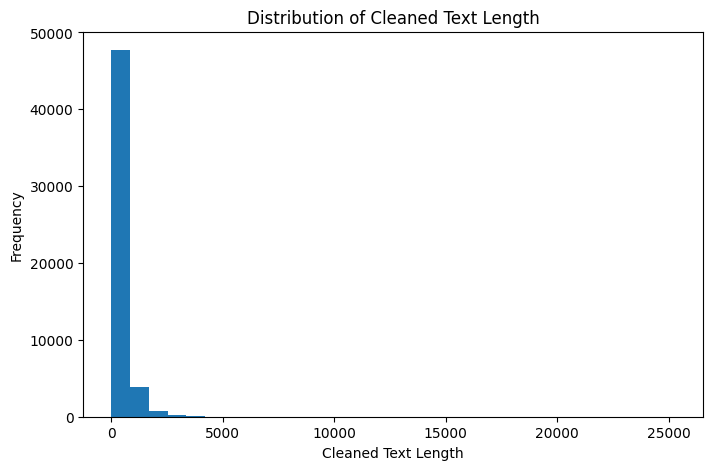

In [33]:
plt.figure(figsize=(8,5))
plt.hist(df['clean_text_length'], bins=30)
plt.title("Distribution of Cleaned Text Length")
plt.xlabel("Cleaned Text Length")
plt.ylabel("Frequency")
plt.show()

## ***The cleaned text length distribution is right-skewed, with most statements being short to medium in length and a small number of very long outliers.***

## Key Observations from Text Cleaning

- Noise such as punctuation and special characters has been removed
- Text length reduced after cleaning, indicating effective preprocessing
- Cleaned text is now suitable for vectorization techniques like TF-IDF

The cleaned dataset will be used in the next notebook
for feature engineering and sentiment label creation.


## Saving Cleaned Data

The cleaned dataset is saved for reuse in further notebooks.


In [35]:
# Save cleaned dataset
df.to_csv(path + "/data/processed_data_cleaned.csv", index=False)